## CAR PRICE PREDICTION

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Display all columns and rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Load data from CarPrice_Assignment.csv dataset

car_df = pd.read_csv("E:\Machine Learning\Project  Supervised Learning Regression\CarPrice_Assignment.csv", engine='python')

In [5]:
# Check the head of the dataset

car_df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# Check for null values

car_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# Dataset dimensions

car_df.shape

(205, 26)

In [8]:
# Dataset information

car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
# More understanding about the dataset

car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
import statsmodels.api as sm

In [11]:
# Function to get VIF (Variation Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_VIF(X_train):
    # A dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

### Data cleaning

In [12]:
# Creating a derived column for company name of cars from the column CarName

car_df.loc[:,'company'] = car_df.CarName.str.split(' ').str[0]

In [13]:
car_df.company = car_df.company.apply(lambda x: str(x).lower())

In [14]:
car_df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are a few company names which are evidently mis-spelled in the dataset like toyota has been written as toyouta. We will go ahead and repair these.

In [15]:
car_df['company'].replace('maxda','mazda',inplace=True)
car_df['company'].replace('porcshce','porsche',inplace=True)
car_df['company'].replace('toyouta','toyota',inplace=True)
car_df['company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [16]:
# Dropping the CarName column

car_df.drop(columns = 'CarName', inplace=True)

In [17]:
car_df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

From business understanding of the automobile domain we can understand the following:

mpfi stands for Multi Point Fuel Injection. There is no such thing as mfi in automobile

In [18]:
car_df['fuelsystem'].replace('mfi','mpfi',inplace=True)

In [19]:
car_df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

Here also we can see that the following data are incorrect.

- ohc hasbeen mis-spelled at places with ohcv
- dohc has been mis-spelled as dohcv

In [20]:
car_df['enginetype'].replace('dohcv','dohc',inplace = True)
car_df['enginetype'].replace('ohcv','ohc',inplace = True)

In [21]:
car_df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Here fwd has been mis-spelled as 4wd

In [22]:
car_df['drivewheel'].replace('4wd', 'fwd', inplace = True)

### Data Understanding and Preparation

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Visualization - Continuous Variable

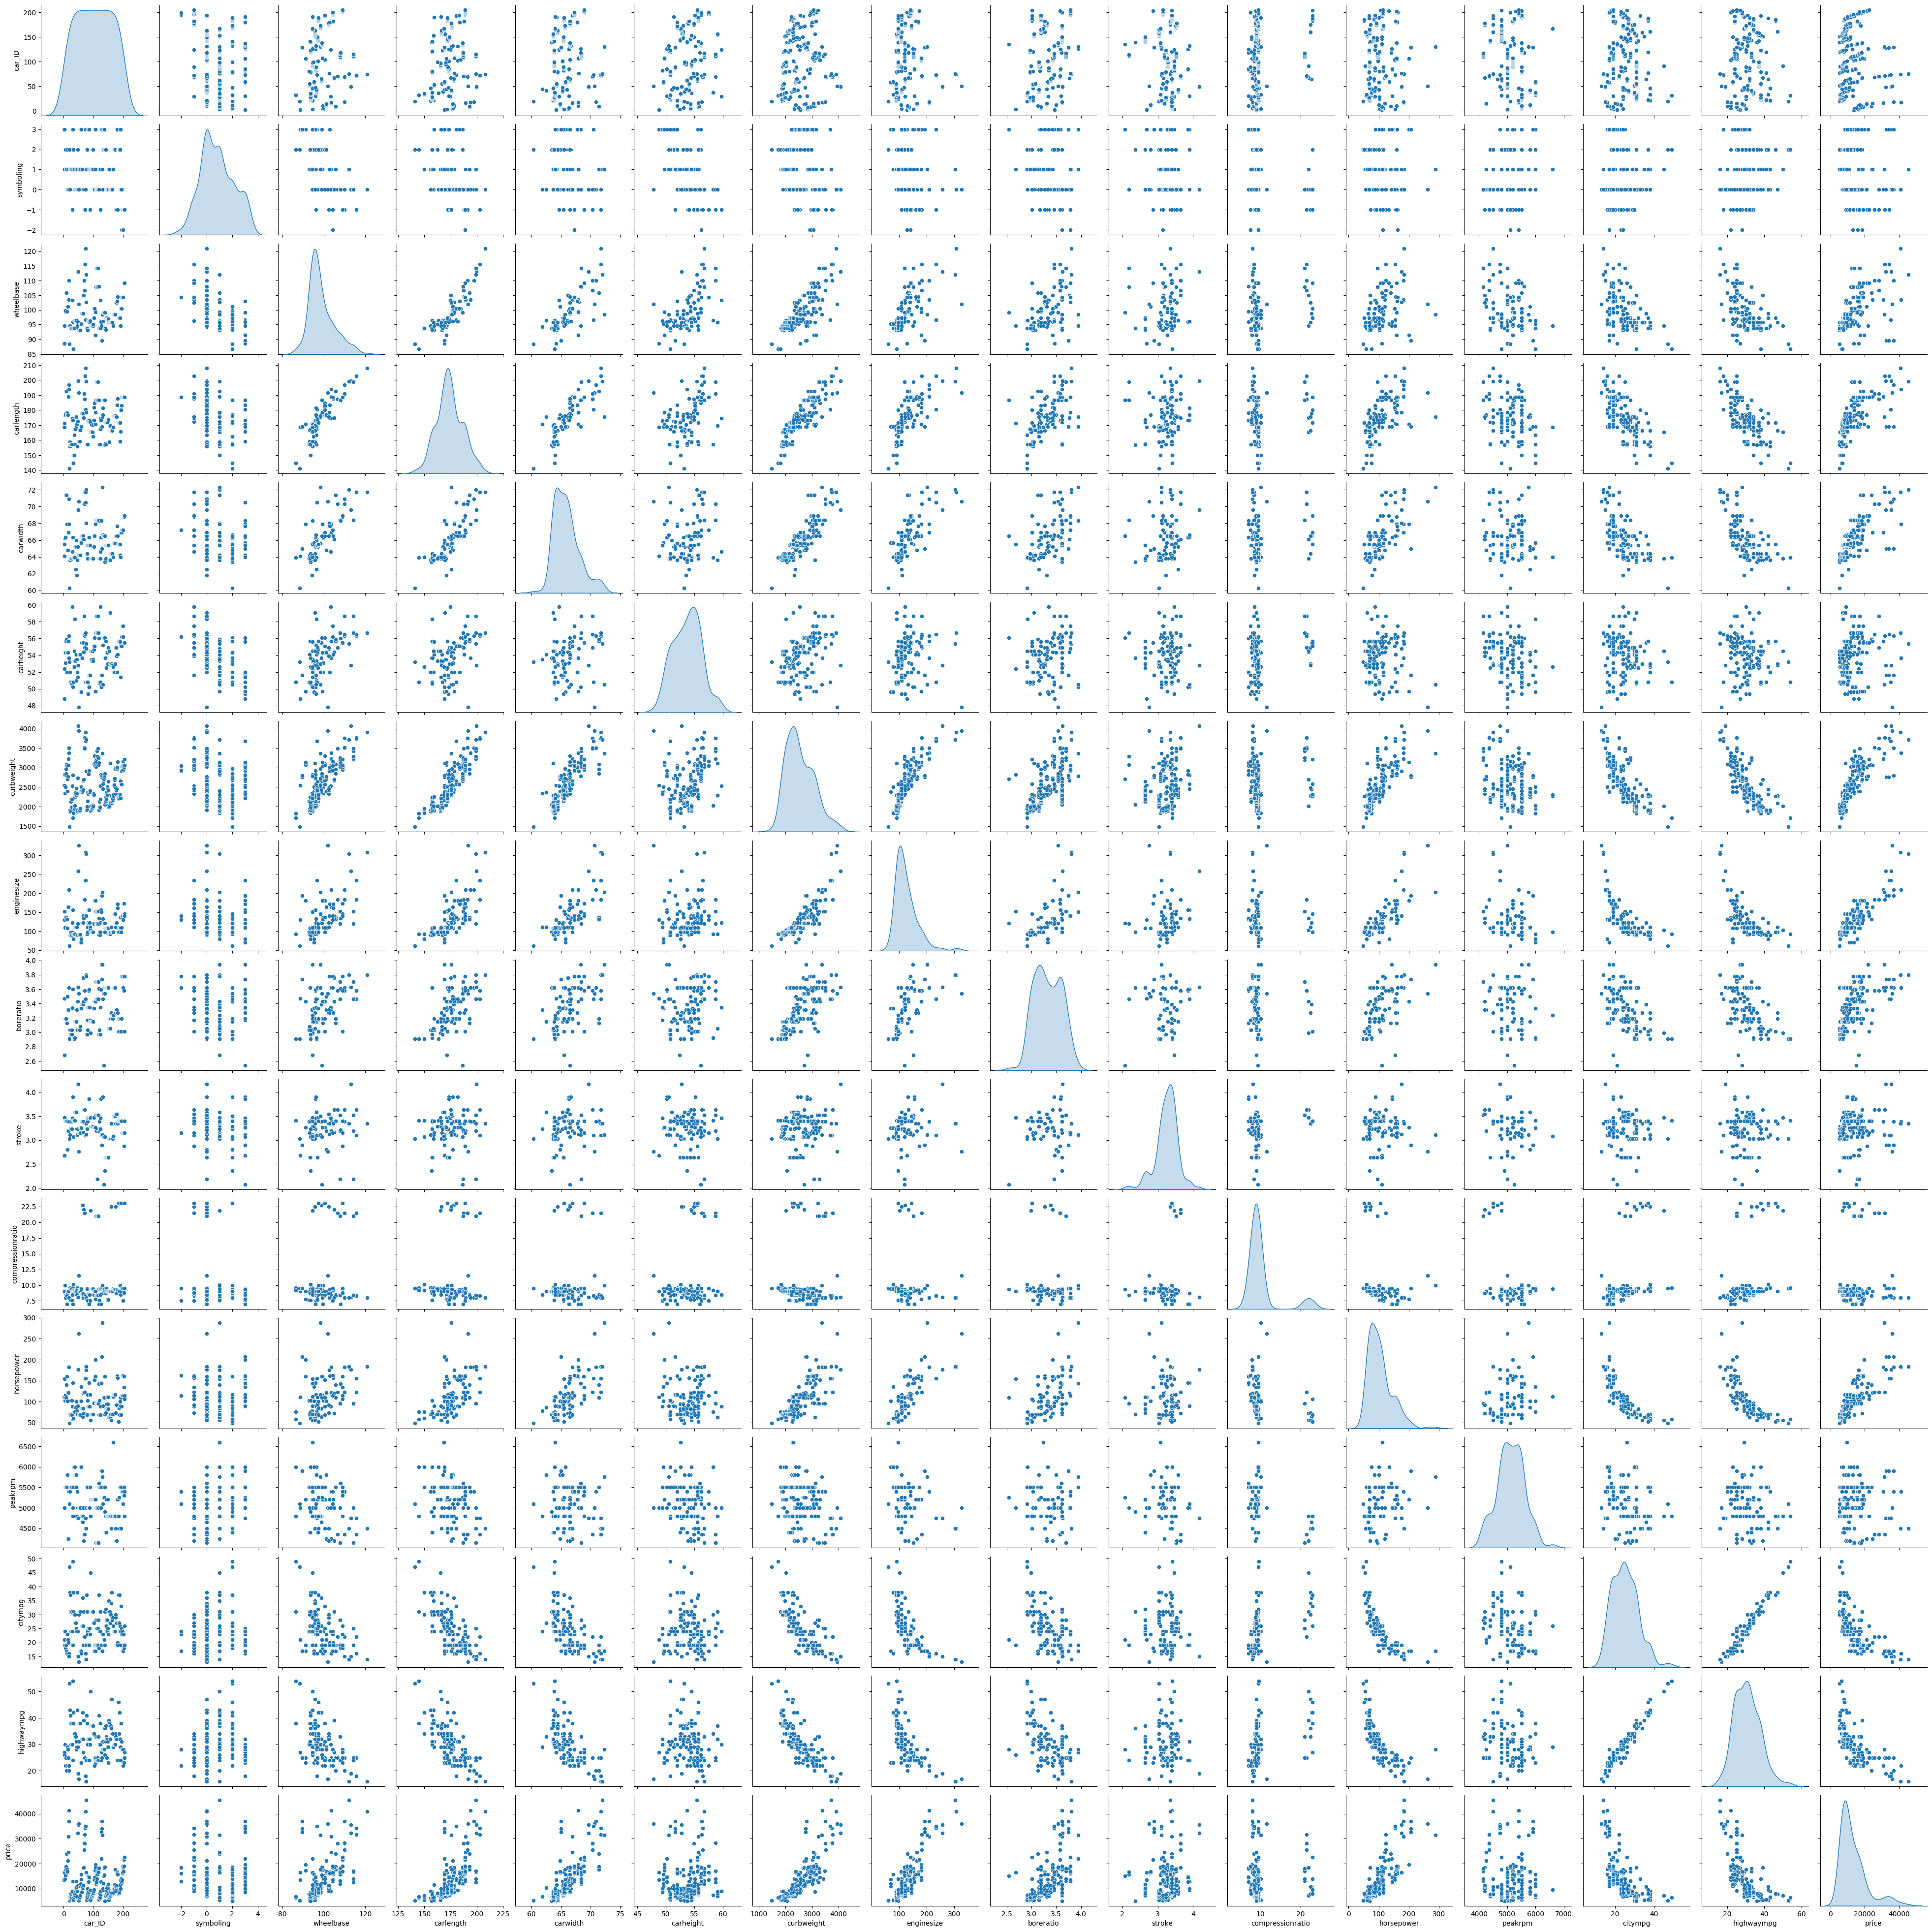

In [24]:
# Plotting a paiplot for the continuous variables

sns.pairplot(car_df, diag_kind="kde")
plt.show()

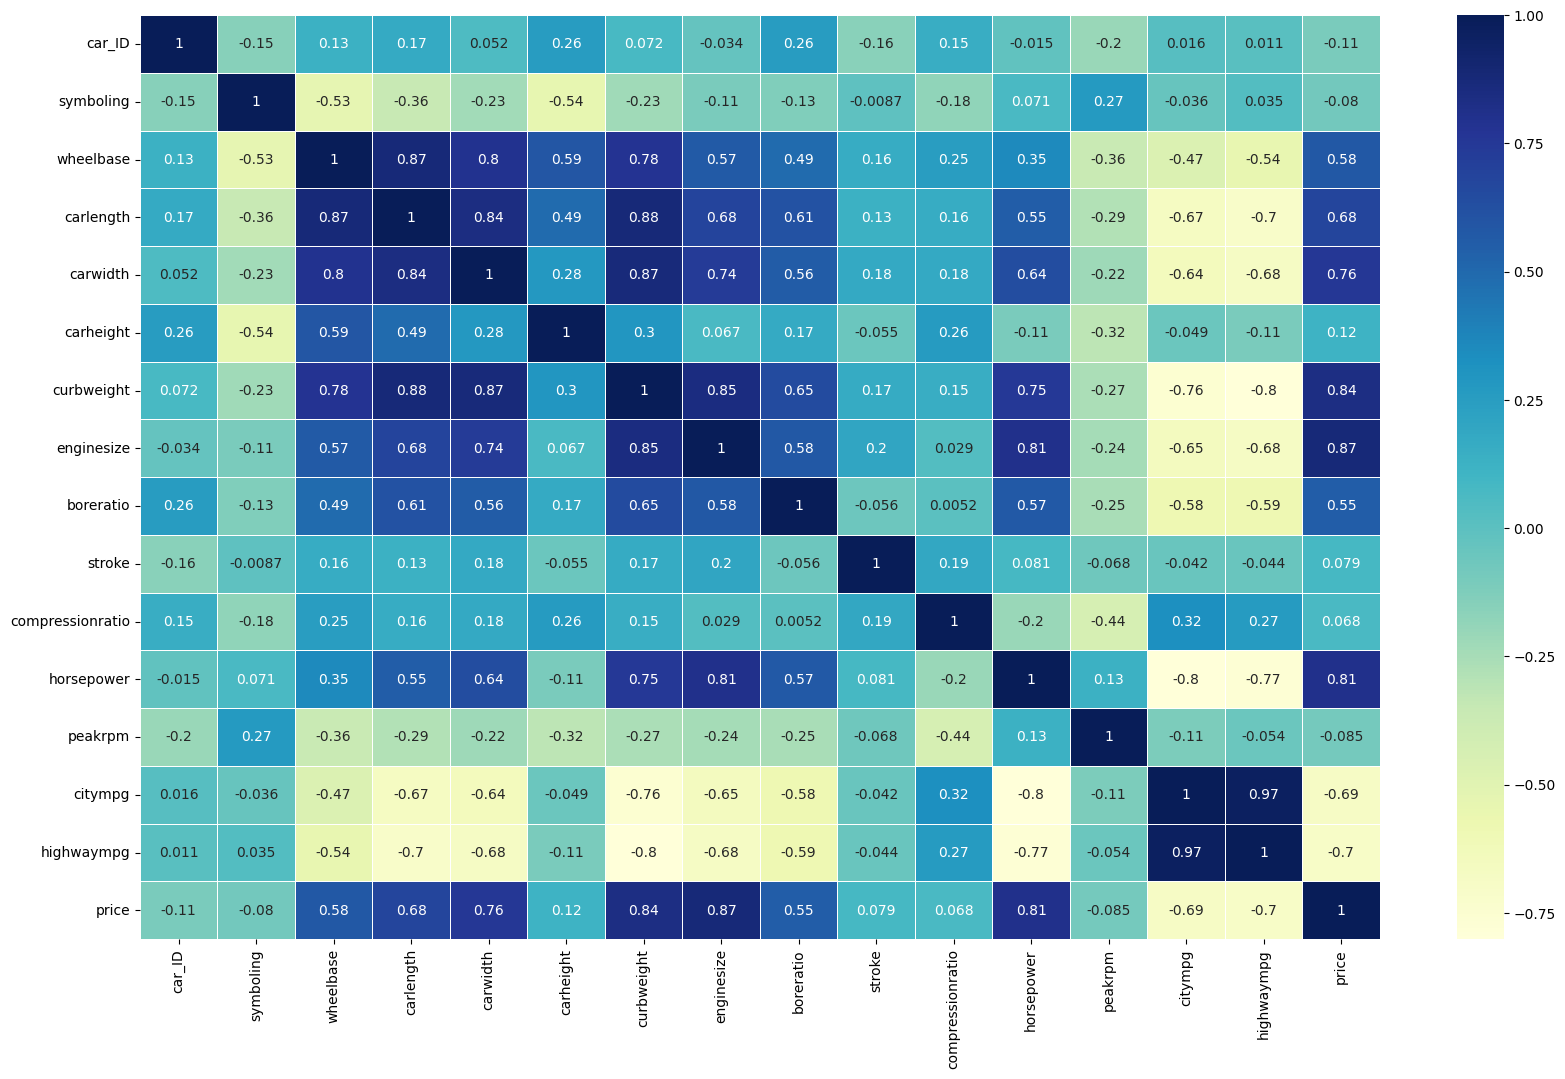

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have removed non-numeric columns or encoded categorical ones
numeric_columns = car_df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(20, 12))
sns.heatmap(numeric_columns.corr(), linewidths=.5, annot=True, cmap="YlGnBu")
plt.show()


From the above plots we can understand the following:

1. The dependent variable price has a high positive co-relation with:

- horsepower
- enginesize
- curbweight
- carwidth
- carlength

2. The dependent variable price has a high negative co-relation with:

- highwaympg
- citympg


Among the variables which have a high relation with the dependent variable price, there are a few variables which have a very high co-relation with some other variables such are:

- enginesize with horsepower and curbwidth
- curbweigth with enginesize, carwidth and carlength
- highwaympg with citympg

These multi-collinearity need to be considered while building the model as non-multicollinearity is one of the assumptions of linear regression

### Derived variable creation

In [26]:
# curbweight/enginesize

car_df.loc[:,'curbweight/enginesize'] = car_df.curbweight/car_df.enginesize


In [27]:
# enginesize/horsepower

car_df.loc[:,'enginesize/horsepower'] = car_df.enginesize/car_df.horsepower

In [28]:
# carwidth/carlength

car_df.loc[:,'carwidth/carlength'] = car_df.carwidth/car_df.carlength

In [29]:
# highwaympg/citympg

car_df.loc[:,'highway/city'] = car_df.highwaympg/car_df.citympg

In [30]:
# We can now drop the corresponding columns as we have taken a ratio.

car_df.drop(columns = ['enginesize','carwidth', 'carlength', 'highwaympg', 'citympg'], inplace = True)

In [31]:
# Checking the dataset once more

car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,company,curbweight/enginesize,enginesize/horsepower,carwidth/carlength,highway/city
0,1,3,gas,std,two,convertible,rwd,front,88.6,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,19.600000,1.171171,0.379739,1.285714
1,2,3,gas,std,two,convertible,rwd,front,88.6,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,19.600000,1.171171,0.379739,1.285714
2,3,1,gas,std,two,hatchback,rwd,front,94.5,52.4,2823,ohc,six,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,18.572368,0.987013,0.382593,1.368421
3,4,2,gas,std,four,sedan,fwd,front,99.8,54.3,2337,ohc,four,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,21.440367,1.068627,0.374858,1.250000
4,5,2,gas,std,four,sedan,fwd,front,99.4,54.3,2824,ohc,five,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,20.764706,1.182609,0.375991,1.222222


In [32]:
# Dropping car_ID column as it is not useful

car_df.drop(columns = 'car_ID', inplace=True)

### Data Visualization - Categorical Variable

The description of symboling given in the data dictionary states, it's assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

We divide as follows:

- -3,-2,-1 --> Safe
- 0,1 --> Moderate
- 2,3 --> Risky

In [33]:
car_df.symboling = car_df.symboling.map({-3: 'safe', -2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

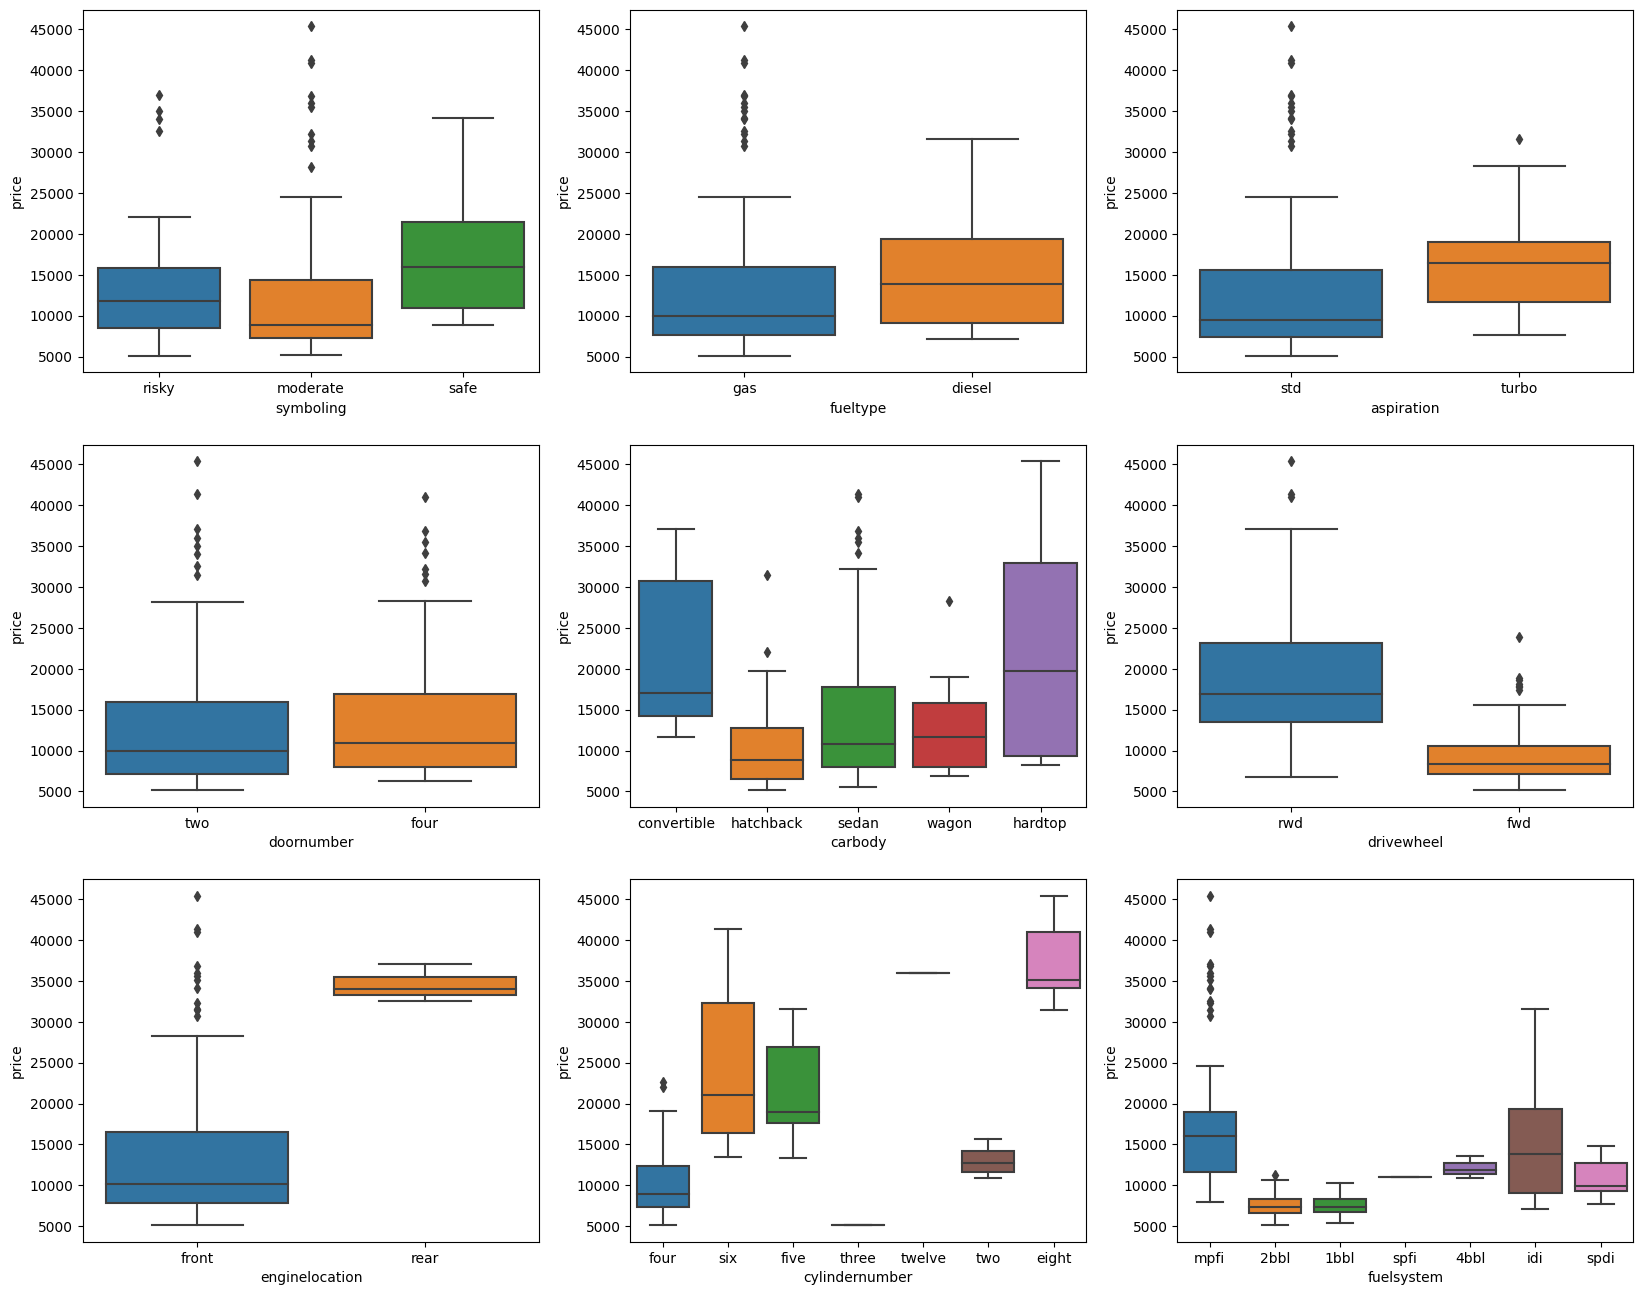

In [34]:
# Visualizing categorical data via boxplots

plt.figure(figsize=(20, 16))
plt.subplot(3,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_df)
plt.show()

1. Cars with rear engines are clearly more priced than others.
2. Similiarly, there is a significant relationship among price and cylinder number and whether it has a risky or safe symbol.
3. However, fuel-type and number of doors does not seem to have that much effect on the price of a car.


<Axes: xlabel='company', ylabel='price'>

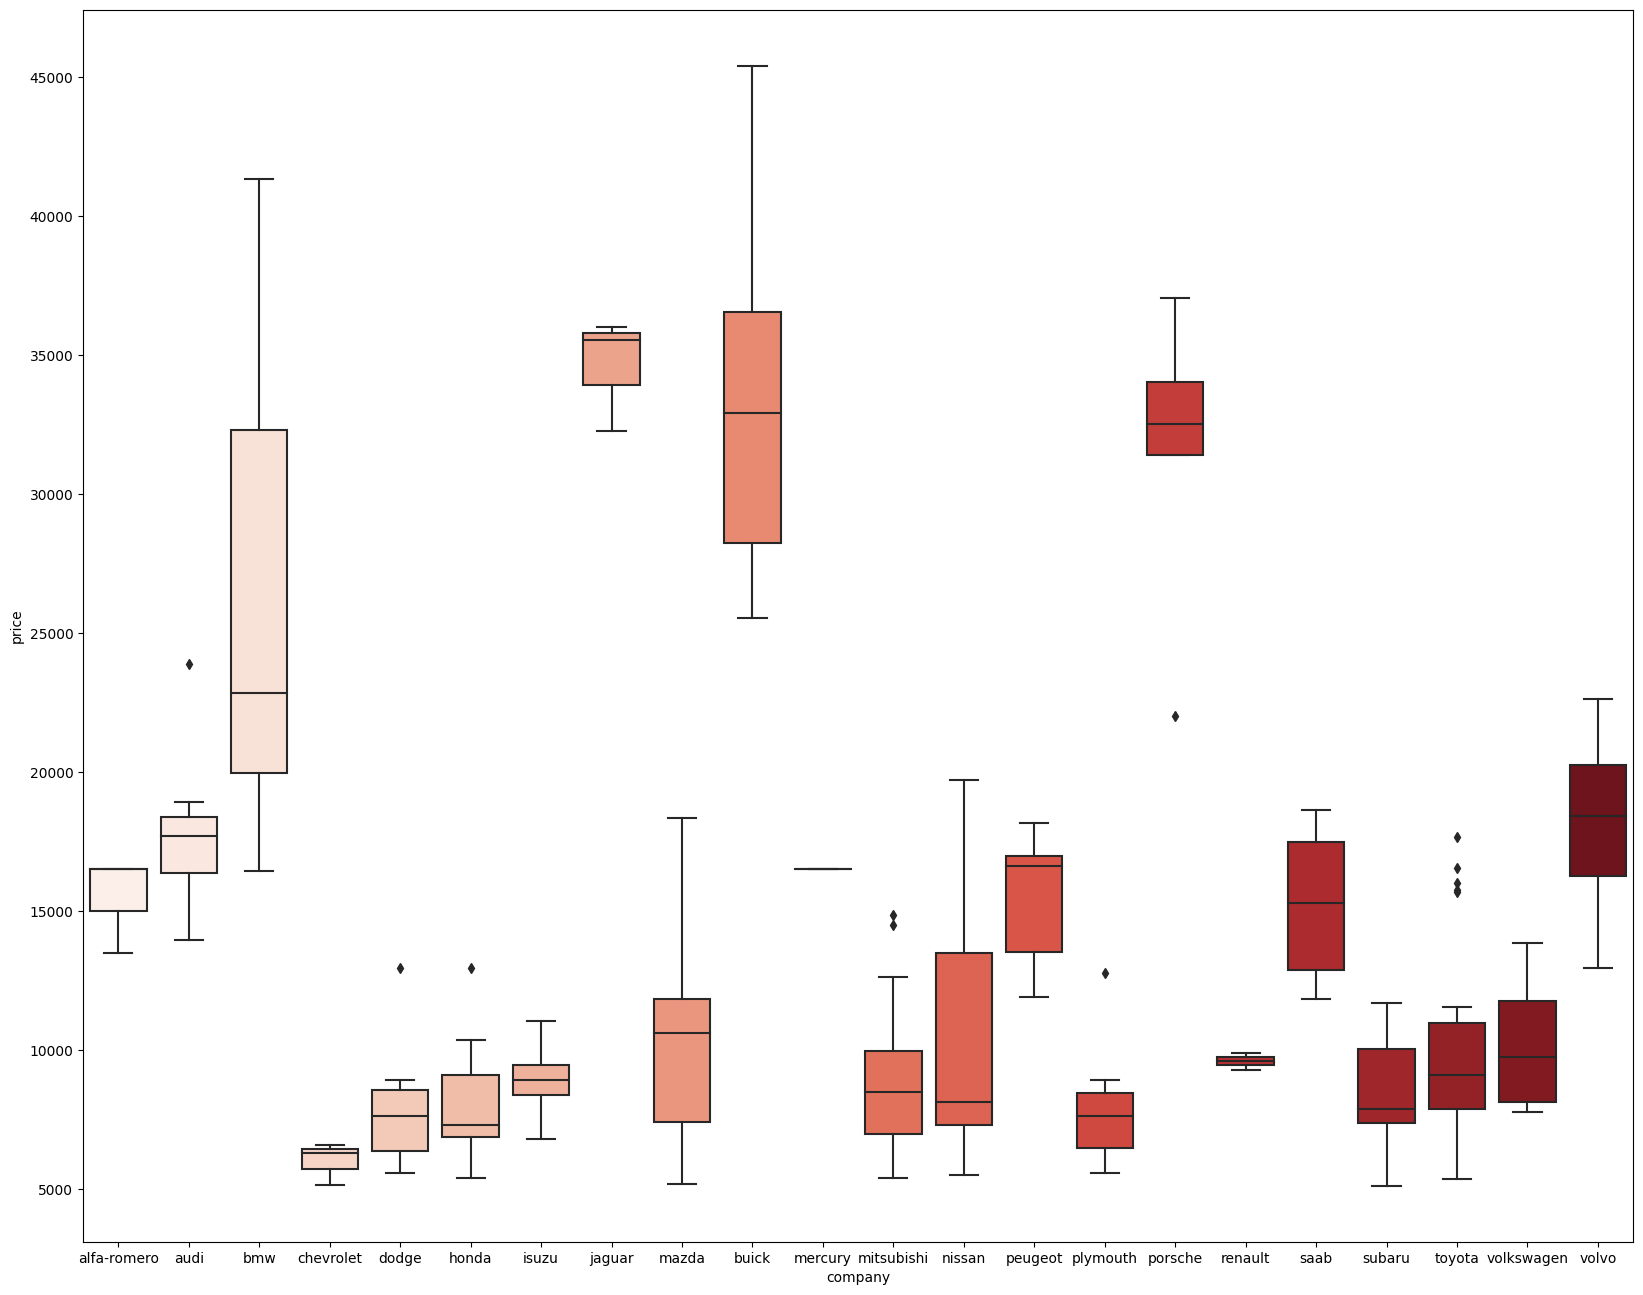

In [35]:
# Plotting company vs price

plt.figure(figsize=(20, 16))
sns.boxplot(x = 'company', y = 'price', data = car_df, palette="Reds")

Company name definitely seems to have a significant effect on the price as companies such as BMW, Jaguar, Buick and Porsche seem to manufacture some serious high end expensive cars.


We can divide the companies into buckets of low, med and high mased on the median price of that company. We choose the mediam price instead of mean as there were some outliers in the data for the feature "company"

In [36]:
median_dict = car_df.groupby(['company'])[['price']].median().to_dict()
median_dict = median_dict['price']
median_dict

{'alfa-romero': 16500.0,
 'audi': 17710.0,
 'bmw': 22835.0,
 'buick': 32892.0,
 'chevrolet': 6295.0,
 'dodge': 7609.0,
 'honda': 7295.0,
 'isuzu': 8916.5,
 'jaguar': 35550.0,
 'mazda': 10595.0,
 'mercury': 16503.0,
 'mitsubishi': 8499.0,
 'nissan': 8124.0,
 'peugeot': 16630.0,
 'plymouth': 7609.0,
 'porsche': 32528.0,
 'renault': 9595.0,
 'saab': 15275.0,
 'subaru': 7894.0,
 'toyota': 9103.0,
 'volkswagen': 9737.5,
 'volvo': 18420.0}

In [37]:
dict_keys = list(median_dict.keys())

# Median price of category below 10000 is low, between 10000 and 20000 is med and above 20000 is high
for i in dict_keys:
    if median_dict[i] < 10000:
        median_dict[i] = 'low'
    elif median_dict[i] >= 10000 and median_dict[i] <= 20000:
        median_dict[i] = 'med'
    else:
        median_dict[i] = 'high'

median_dict

{'alfa-romero': 'med',
 'audi': 'med',
 'bmw': 'high',
 'buick': 'high',
 'chevrolet': 'low',
 'dodge': 'low',
 'honda': 'low',
 'isuzu': 'low',
 'jaguar': 'high',
 'mazda': 'med',
 'mercury': 'med',
 'mitsubishi': 'low',
 'nissan': 'low',
 'peugeot': 'med',
 'plymouth': 'low',
 'porsche': 'high',
 'renault': 'low',
 'saab': 'med',
 'subaru': 'low',
 'toyota': 'low',
 'volkswagen': 'low',
 'volvo': 'med'}

In [38]:
car_df.company = car_df.company.map(median_dict)
car_df.company.unique()

array(['med', 'high', 'low'], dtype=object)

### One Hot Encoding for the categorical variables¶

In [39]:
car_df = pd.get_dummies(car_df, drop_first=True)

In [40]:
# Checking dataframe after dummy variable creation

car_df.head()

,wheelbase,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,price,curbweight/enginesize,enginesize/horsepower,carwidth/carlength,highway/city,symboling_risky,symboling_safe,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_low,company_med
0,88.6,48.8,2548,3.47,2.68,9.0,111,5000,13495.0,19.600000,1.171171,0.379739,1.285714,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
1,88.6,48.8,2548,3.47,2.68,9.0,111,5000,16500.0,19.600000,1.171171,0.379739,1.285714,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
2,94.5,52.4,2823,2.68,3.47,9.0,154,5000,16500.0,18.572368,0.987013,0.382593,1.368421,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
3,99.8,54.3,2337,3.19,3.40,10.0,102,5500,13950.0,21.440367,1.068627,0.374858,1.250000,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
4,99.4,54.3,2824,3.19,3.40,8.0,115,5500,17450.0,20.764706,1.182609,0.375991,1.222222,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True


#### Splitting the entire dataset into test and train data

Here we are splitting the data in a 75 and 25 ratio for train and test respectively.

In [41]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
print("Train data shape: ", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape:  (143, 42)
Test data shape:  (62, 42)


#### Feature scaling

Feature scaling is necessary for all continuous variables to help the gradient decent algorithm converge quickly.

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
conti_vars = ['wheelbase', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'horsepower', 'curbweight', 'price', 'curbweight/enginesize', 'carwidth/carlength', 'highway/city', 'enginesize/horsepower']
df_train[conti_vars] = scaler.fit_transform(df_train[conti_vars])

df_train.describe()

,wheelbase,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,price,curbweight/enginesize,enginesize/horsepower,carwidth/carlength,highway/city
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.509004,0.407878,0.497946,0.535389,0.190787,0.227302,0.400029,0.219310,0.405582,0.489932,0.377391,0.355073
std,0.205581,0.215378,0.211269,0.207140,0.157843,0.237181,0.165511,0.196438,0.215682,0.151818,0.171785,0.187731,0.139367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.353982,0.245539,0.305556,0.464646,0.100000,0.091667,0.265306,0.067298,0.339434,0.405376,0.248714,0.275974
50%,0.341379,0.522124,0.355702,0.500000,0.545455,0.125000,0.191667,0.428571,0.140343,0.397537,0.505304,0.361980,0.348974
75%,0.503448,0.668142,0.559542,0.682540,0.611111,0.150000,0.283333,0.551020,0.313479,0.447190,0.592847,0.462799,0.412121
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# X and y division

y_train = df_train.pop('price')
X_train = df_train

### Modeling

We first use sklearn's RFE(Recursive Feature Elimination) technique to reduce down the model to 10 values.

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
pip install --upgrade seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
# lm = LinearRegression()
# lm.fit(X_train, y_train)

# rfe = RFE(lm, 10)             # running RFE to select 10 best features
# rfe = rfe.fit(X_train, y_train)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

# Use LinearRegression as the estimator in RFE
rfe = RFE(estimator=lm, n_features_to_select=10)  # Select 10 best features
rfe = rfe.fit(X_train, y_train)


Model 1 - 10 features

In [50]:
print(y_train.dtype)


float64


In [51]:
import numpy as np

print(np.array(y_train).dtype)


float64


In [52]:
print(X_train.dtypes)


wheelbase                float64
carheight                float64
curbweight               float64
boreratio                float64
stroke                   float64
compressionratio         float64
horsepower               float64
peakrpm                  float64
curbweight/enginesize    float64
enginesize/horsepower    float64
carwidth/carlength       float64
highway/city             float64
symboling_risky             bool
symboling_safe              bool
fueltype_gas                bool
aspiration_turbo            bool
doornumber_two              bool
carbody_hardtop             bool
carbody_hatchback           bool
carbody_sedan               bool
carbody_wagon               bool
drivewheel_rwd              bool
enginelocation_rear         bool
enginetype_l                bool
enginetype_ohc              bool
enginetype_ohcf             bool
enginetype_rotor            bool
cylindernumber_five         bool
cylindernumber_four         bool
cylindernumber_six          bool
cylindernu

In [53]:
# Convert specific columns to float64 if needed
columns_to_convert = ['wheelbase', 'curbweight', 'horsepower']
X_train[columns_to_convert] = X_train[columns_to_convert].astype(float)


In [54]:
print(X_train.dtypes)

wheelbase                float64
carheight                float64
curbweight               float64
boreratio                float64
stroke                   float64
compressionratio         float64
horsepower               float64
peakrpm                  float64
curbweight/enginesize    float64
enginesize/horsepower    float64
carwidth/carlength       float64
highway/city             float64
symboling_risky             bool
symboling_safe              bool
fueltype_gas                bool
aspiration_turbo            bool
doornumber_two              bool
carbody_hardtop             bool
carbody_hatchback           bool
carbody_sedan               bool
carbody_wagon               bool
drivewheel_rwd              bool
enginelocation_rear         bool
enginetype_l                bool
enginetype_ohc              bool
enginetype_ohcf             bool
enginetype_rotor            bool
cylindernumber_five         bool
cylindernumber_four         bool
cylindernumber_six          bool
cylindernu

In [55]:
missing_values = X_train.isnull().sum()
print(missing_values)


wheelbase                0
carheight                0
curbweight               0
boreratio                0
stroke                   0
compressionratio         0
horsepower               0
peakrpm                  0
curbweight/enginesize    0
enginesize/horsepower    0
carwidth/carlength       0
highway/city             0
symboling_risky          0
symboling_safe           0
fueltype_gas             0
aspiration_turbo         0
doornumber_two           0
carbody_hardtop          0
carbody_hatchback        0
carbody_sedan            0
carbody_wagon            0
drivewheel_rwd           0
enginelocation_rear      0
enginetype_l             0
enginetype_ohc           0
enginetype_ohcf          0
enginetype_rotor         0
cylindernumber_five      0
cylindernumber_four      0
cylindernumber_six       0
cylindernumber_three     0
cylindernumber_twelve    0
cylindernumber_two       0
fuelsystem_2bbl          0
fuelsystem_4bbl          0
fuelsystem_idi           0
fuelsystem_mpfi          0
f

In [56]:
print(y_train.dtypes)


float64


In [57]:
y_train = pd.to_numeric(y_train)


In [59]:
print(X_train_const.dtypes)
print(X_train.dtypes)


NameError: name 'X_train_const' is not defined

In [60]:
non_numeric_columns = X_train.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_columns)


Index(['symboling_risky', 'symboling_safe', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_low', 'company_med'],
      dtype='object')


In [61]:
X_train[non_numeric_columns] = X_train[non_numeric_columns].astype(float)


In [62]:
pip install --upgrade pandas numpy statsmodels


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~andas\\_libs\\algos.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pandas-2.0.3-cp311-cp311-win_amd64.whl (10.6 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.1
    Uninstalling pandas-2.0.1:
      Successfully uninstalled pandas-2.0.1


In [63]:
import numpy as np

X_train_array = np.array(X_train)
y_train_array = np.array(y_train)

lm_1 = sm.OLS(y_train_array, X_train_array).fit()
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     60.02
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           1.91e-55
Time:                        00:07:57   Log-Likelihood:                 240.92
No. Observations:                 143   AIC:                            -403.8
Df Residuals:                     104   BIC:                            -288.3
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3289      0.077      4.273      0.0

This seems a decent point to start removing features one by one. All the features except carbody_hardtop have acceptable p-values. Hence we will start removing feature carbody_hardtop and rebuild the model.

In [64]:
import statsmodels.api as sm

# Add constant to X_train
X_train_const = sm.add_constant(X_train, prepend=False)

# Fit the regression model
lm_1 = sm.OLS(y_train, X_train_const).fit()

# Print the updated summary
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     60.02
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           1.91e-55
Time:                        00:08:02   Log-Likelihood:                 240.92
No. Observations:                 143   AIC:                            -403.8
Df Residuals:                     104   BIC:                            -288.3
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
wheelbase                 0.32

In [65]:
print(X_train.columns)


Index(['wheelbase', 'carheight', 'curbweight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'curbweight/enginesize',
       'enginesize/horsepower', 'carwidth/carlength', 'highway/city',
       'symboling_risky', 'symboling_safe', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_low', 'company_med'],
      dtype='object')


Model 2 - 9 features

In [66]:
X_train_sm = sm.add_constant(X_train)
lm_2 = sm.OLS(y_train, X_train_sm).fit()
print(lm_2.summary()) #stats
get_VIF(X_train_sm) #VIF

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     60.02
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           1.91e-55
Time:                        00:08:06   Log-Likelihood:                 240.92
No. Observations:                 143   AIC:                            -403.8
Df Residuals:                     104   BIC:                            -288.3
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

wheelbase came out to have a high p-value. Removing and rebuilding model.

In [67]:
X_train.drop(columns='wheelbase', inplace=True)

Model 3 - 8 features

In [68]:
X_train_sm = sm.add_constant(X_train)
lm_3 = sm.OLS(y_train, X_train_sm).fit()
print(lm_3.summary()) #stats
get_VIF(X_train_sm) #VIF

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     52.52
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           1.02e-52
Time:                        00:08:10   Log-Likelihood:                 229.36
No. Observations:                 143   AIC:                            -382.7
Df Residuals:                     105   BIC:                            -270.1
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.14

carbody_sedan has a high p-value and a VIF above 5. So it becomes a very good candidate to be dropped.

In [69]:
X_train.drop(columns='carbody_sedan', inplace=True)

Model 4 - 7 features

In [70]:
X_train_sm = sm.add_constant(X_train)
lm_4 = sm.OLS(y_train, X_train_sm).fit()
print(lm_4.summary()) #stats
get_VIF(X_train_sm) #VIF

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     52.89
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           5.97e-53
Time:                        00:08:15   Log-Likelihood:                 227.33
No. Observations:                 143   AIC:                            -380.7
Df Residuals:                     106   BIC:                            -271.0
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

At this point we see that all the p values are below 0.05 and the VIFs are also below 5. So we can be pretty confident that this is a good model.


We also see that lm_4 model has an R-squared value of 0.926 and an adjusted R-squared value of 0.922



### Residual Analysis

On training data

In [71]:
y_train_price = lm_4.predict(X_train_sm)

Text(0.5, 0.98, 'Residual Error Distribution')

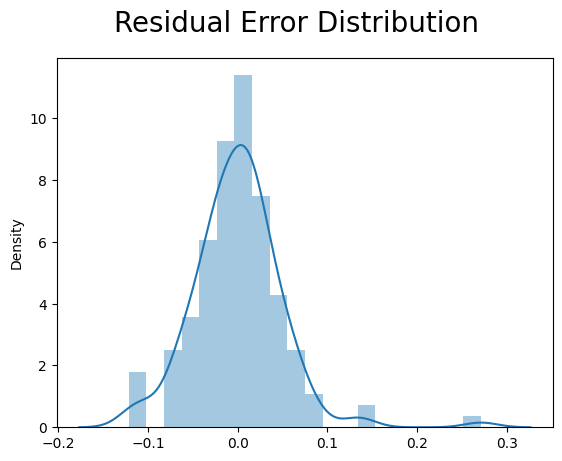

In [72]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Residual Error Distribution', fontsize = 20)

The residual errors are distributed in a bell shaped curve with the mean centered at 0.0. It is showing a good Normal Distribution curve

On testing data

In [73]:
# We are scaling the testing set with the already existing scaler object which has been fitted on the train dataset

df_test[conti_vars] = scaler.transform(df_test[conti_vars])

df_test.describe()

,wheelbase,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,price,curbweight/enginesize,enginesize/horsepower,carwidth/carlength,highway/city
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559663,0.428470,0.556580,0.544314,0.209375,0.248858,0.393351,0.239439,0.379273,0.493432,0.342657,0.367925
std,0.212861,0.215811,0.179488,0.228484,0.160738,0.273690,0.163376,0.192092,0.233076,0.126288,0.179882,0.180874,0.133403
min,0.000000,0.141593,0.128394,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.007763,0.004729,0.119311,0.000000,0.000000
25%,0.313793,0.384956,0.305275,0.404762,0.484848,0.093750,0.107292,0.265306,0.092342,0.317447,0.369913,0.229652,0.304833
50%,0.387931,0.588496,0.406129,0.563492,0.585859,0.125000,0.218750,0.346939,0.158991,0.405467,0.485552,0.345263,0.375921
75%,0.570690,0.699115,0.564876,0.746032,0.641414,0.150000,0.295833,0.540816,0.317243,0.461491,0.588621,0.396900,0.406699
max,1.182759,1.061947,0.935609,0.888889,0.863636,1.000000,0.662500,1.000000,1.112855,0.615282,1.000000,1.000000,0.727273


In [74]:
# X and y division

y_test = df_test.pop('price')
X_test = df_test

In [75]:
X_test = X_test[col_rfe]

NameError: name 'col_rfe' is not defined

In [76]:
X_test.drop(columns=['carbody_sedan', 'wheelbase', 'carbody_hardtop'], inplace=True) 
# Dropping columns which we dropped while building the model after RFE

In [77]:
X_test_sm = sm.add_constant(X_test)

In [78]:
y_pred = lm_4.predict(X_test_sm)

ValueError: shapes (62,39) and (40,) not aligned: 39 (dim 1) != 40 (dim 0)

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('y_test_price', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

NameError: name 'y_pred' is not defined

<Figure size 640x480 with 0 Axes>

### Model Evaluation

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [81]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

NameError: name 'y_pred' is not defined

R2_score on training data: 0.926

R2_score on testing data: 0.914


This proves that our model is able to explain the variance of the test set, almost as much as it is explaining the variance of the training set.

NameError: name 'y_pred' is not defined

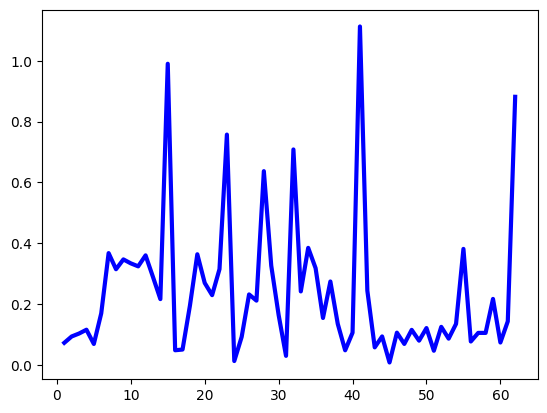

In [82]:
c = [i for i in range(1,63)]

fig = plt.figure()
plt.plot(c,y_test,color="blue",linewidth=3,linestyle='-')
plt.plot(c,y_pred,color="red",linewidth=3,linestyle='-')
plt.ylabel('Car Price')
plt.xlabel('Index')

The test vs predicted results almost overlap each other which shows good prediction.

The final model has the following features and coefficients:


    Feature Name	          Co-efficient
    curbweight   	          0.4328
    horsepower	          0.2874
    carbody_hatchback	 -0.0232
    carbody_wagon	         -0.0454
    enginelocation_rear	  0.1697
    company_low	         -0.2831
    company_med   	         -0.2307

## Final Analysis and Recommendations

     We can use the above features to determine the price of a car which they are about to distribute in the US market.

    Along with that, our initial analysis brought out some valient features which has a huge impact on the price of a car. These are summarized again below:-

1. Company Name - Brand value is a big factor. Companies such as Porsche, BMW, Jaguar produce some expensive cars. So price depends a lot on the company of the car.
2. Symboling - Cars symboled safe have a higher price range than others.
3. Fueltype - Diesel powered cars tend to be very slightly expensive than their petrol counterparts. This could be because diesel is less expensive than petrol and thus a diesel car willcost less over time.
4. Engine Location - Cars with engines on the rear are significantly more expensive than the cars with engine on the front. This is mainly because the expensive sports cars have engine towards the back for better balance at high speeds and aerodynamic enhancement.
5. Cylinder Number - With the increase in the number of cylinders, the prices increase as well
 